### CNN (Convolutional Neural Network, 합성곱 신경망)
- 이미지/영상 데이터에서 많이 활용

In [1]:
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [2]:
data = datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = data.load_data()

In [3]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape # 컬러이미지의 경우는 RGB값까지 해서 4차원 데이터가 된다. 지금은 흑백이라 3차원

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

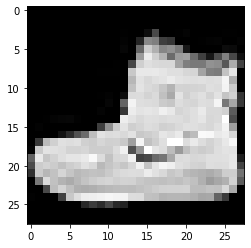

In [4]:
plt.imshow(train_x[0], 'gray')
plt.show()

In [5]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
train_y[0]

9

In [7]:
'''
레이블

0 : 티셔츠
1 : 바지
2 : 풀오버(스웨터)
3 : 드레스
4 : 코트
5 : 샌들
6 : 셔츠
7 : 스니커즈
8 : 가방
9 : 앵클부츠
'''
# 데이터 분리
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, random_state=10)

In [8]:
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((45000, 28, 28), (15000, 28, 28), (45000,), (15000,))

In [9]:
# 4차원으로 변환, 정규화(min-max)
train_x = train_x.reshape(-1, 28, 28, 1)/255
valid_x = valid_x.reshape(-1, 28, 28, 1)/255
test_x = test_x.reshape(-1, 28, 28, 1)/255

In [10]:
# label(category) 원핫인코딩
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
valid_y = to_categorical(valid_y)
test_y = to_categorical(test_y)

In [11]:
train_x.shape

(45000, 28, 28, 1)

### CNN 구현

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

'''
합성곱 Conv2D 매개변수
filters : 특징맵의 차원
kernel_size : 필터의 크기(튜플), 스칼라값도 가능
padding : 'same' -> 입력과 출력 형태가 동일
activation : 활성화함수(relu)
input_shape : 입력데이터의 차원
'''
model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
# 풀링레이어
# pool_size : 커널의 크기
model.add(MaxPool2D(2,2))

# 동일한 층 반복해주기
model.add(Conv2D(16, (3,3), padding='same', activation='relu')) # input_shape는 맨 처음에만 넣어준다
model.add(MaxPool2D(2,2))

# 평탄화(flatten)
model.add(Flatten())

# 전결합(Fully connected) 레이어 추가
model.add(Dense(32, activation='relu'))

# 출력레이어
model.add(Dense(10, activation='softmax'))

In [13]:
# 모델 구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                2

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='acc')
history = model.fit(train_x, train_y, epochs=50, batch_size=50, validation_data=(valid_x, valid_y))

Epoch 1/50
900/900 [==============================] - 10s 10ms/step - loss: 0.5932 - acc: 0.7866 - val_loss: 0.4415 - val_acc: 0.8444
Epoch 2/50
900/900 [==============================] - 9s 10ms/step - loss: 0.3907 - acc: 0.8599 - val_loss: 0.3753 - val_acc: 0.8687
Epoch 3/50
900/900 [==============================] - 9s 10ms/step - loss: 0.3462 - acc: 0.8770 - val_loss: 0.3445 - val_acc: 0.8774
Epoch 4/50
900/900 [==============================] - 9s 10ms/step - loss: 0.3127 - acc: 0.8861 - val_loss: 0.3166 - val_acc: 0.8887
Epoch 5/50
900/900 [==============================] - 9s 10ms/step - loss: 0.2905 - acc: 0.8960 - val_loss: 0.3152 - val_acc: 0.8879
Epoch 6/50
900/900 [==============================] - 9s 10ms/step - loss: 0.2693 - acc: 0.9044 - val_loss: 0.3194 - val_acc: 0.8844
Epoch 7/50
900/900 [==============================] - 9s 10ms/step - loss: 0.2555 - acc: 0.9066 - val_loss: 0.2874 - val_acc: 0.8984
Epoch 8/50
900/900 [==============================] - 9s 10ms/step -

In [15]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.4354 - acc: 0.9020


[0.43536576628685, 0.9020000100135803]

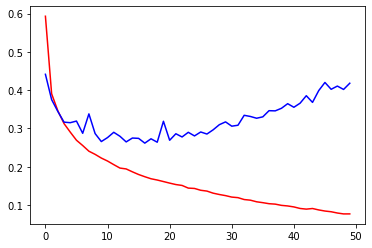

In [16]:
plt.plot(history.history['loss'], c="r")
plt.plot(history.history['val_loss'], c="b")

In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np
pred = model.predict(test_x)
confusion_matrix(np.argmax(test_y, axis=1), np.argmax(pred, axis=1))

313/313 [==============================] - 1s 2ms/step


array([[840,   0,  12,  21,   4,   2, 112,   0,   9,   0],
       [  3, 982,   0,   7,   3,   0,   4,   0,   1,   0],
       [ 20,   0, 820,  11,  84,   0,  64,   0,   1,   0],
       [ 12,   5,  11, 914,  28,   0,  28,   0,   2,   0],
       [  1,   0,  33,  32, 897,   0,  37,   0,   0,   0],
       [  0,   0,   0,   0,   0, 968,   0,  20,   3,   9],
       [ 95,   1,  52,  38,  99,   0, 708,   0,   6,   1],
       [  0,   0,   0,   0,   0,   8,   0, 971,   1,  20],
       [  2,   0,   0,   4,   6,   2,   8,   4, 973,   1],
       [  0,   0,   1,   0,   0,  10,   1,  40,   1, 947]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(test_y, axis=1), np.argmax(pred, axis=1)))


              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.82      0.85      1000
           3       0.89      0.91      0.90      1000
           4       0.80      0.90      0.85      1000
           5       0.98      0.97      0.97      1000
           6       0.74      0.71      0.72      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### 성능개선
#### Regularizer
- 규제함수
- 모델의 복잡도를 제한해주는 함수
- L1규제 : 가중치 절대값의 합
- L2규제 : 가중체 절대값 제곱의 합
- 보통 L2 사용

#### BatchNormalization
- 데이터의 범위를 제한
- 배치정규화 후 활성화함수 적용

#### Dropout
- 레이어의 특정 가중치를 제외
- 비율은 보통 : 0.2~0.5 사이

In [19]:
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout

model = Sequential()

'''
합성곱 Conv2D 매개변수
filters : 특징맵의 차원
kernel_size : 필터의 크기(튜플), 스칼라값도 가능
padding : 'same' -> 입력과 출력 형태가 동일
activation : 활성화함수(relu)
input_shape : 입력데이터의 차원
'''
model.add(Conv2D(16, (3,3), padding='same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# 풀링레이어
# pool_size : 커널의 크기
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

# 동일한 층 반복해주기
model.add(Conv2D(16, (3,3), padding='same')) # input_shape는 제외
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

# 평탄화(flatten)
model.add(Flatten())

# 전결합(Fully connected) 레이어 추가
model.add(Dense(32))

# 출력레이어
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='acc')
history = model.fit(train_x, train_y, epochs=10, batch_size=50, validation_data=(valid_x, valid_y))

Epoch 1/10
900/900 [==============================] - 14s 15ms/step - loss: 0.6048 - acc: 0.7856 - val_loss: 0.4199 - val_acc: 0.8521
Epoch 2/10
900/900 [==============================] - 15s 17ms/step - loss: 0.4129 - acc: 0.8516 - val_loss: 0.3705 - val_acc: 0.8681
Epoch 3/10
900/900 [==============================] - 15s 17ms/step - loss: 0.3695 - acc: 0.8686 - val_loss: 0.3617 - val_acc: 0.8713
Epoch 4/10
900/900 [==============================] - 15s 17ms/step - loss: 0.3459 - acc: 0.8755 - val_loss: 0.3127 - val_acc: 0.8911
Epoch 5/10
900/900 [==============================] - 15s 17ms/step - loss: 0.3289 - acc: 0.8815 - val_loss: 0.3122 - val_acc: 0.8889
Epoch 6/10
900/900 [==============================] - 16s 17ms/step - loss: 0.3160 - acc: 0.8858 - val_loss: 0.3097 - val_acc: 0.8903
Epoch 7/10
900/900 [==============================] - 15s 17ms/step - loss: 0.3105 - acc: 0.8884 - val_loss: 0.2915 - val_acc: 0.8965
Epoch 8/10
900/900 [==============================] - 15s 17ms

In [20]:
from sklearn.metrics import classification_report
pred = model.predict(test_x)
print(classification_report(np.argmax(test_y, axis=1), np.argmax(pred, axis=1)))


              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.82      0.85      1000
           3       0.89      0.91      0.90      1000
           4       0.80      0.90      0.85      1000
           5       0.98      0.97      0.97      1000
           6       0.74      0.71      0.72      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### Early Stopping
* monitor : 모니터링(val_loss)
* patience : loss가 감소하지 않는(증가하는) epochs 허용 횟수

In [27]:
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout

model = Sequential()

'''
합성곱 Conv2D 매개변수
filters : 특징맵의 차원
kernel_size : 필터의 크기(튜플), 스칼라값도 가능
padding : 'same' -> 입력과 출력 형태가 동일
activation : 활성화함수(relu)
input_shape : 입력데이터의 차원
'''
model.add(Conv2D(16, (3,3), padding='same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# 풀링레이어
# pool_size : 커널의 크기
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

# 동일한 층 반복해주기
model.add(Conv2D(16, (3,3), padding='same')) # input_shape는 제외
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

# 평탄화(flatten)
model.add(Flatten())

# 전결합(Fully connected) 레이어 추가
model.add(Dense(32))

# 출력레이어
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='acc')

# Early Stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = model.fit(train_x, train_y, epochs=50, batch_size=50, validation_data=(valid_x, valid_y), callbacks=[es, mc])

Epoch 1/50
900/900 [==============================] - 16s 18ms/step - loss: 0.5936 - acc: 0.7903 - val_loss: 0.4005 - val_acc: 0.8559
Epoch 2/50
900/900 [==============================] - 15s 17ms/step - loss: 0.4085 - acc: 0.8530 - val_loss: 0.3480 - val_acc: 0.8766
Epoch 3/50
900/900 [==============================] - 16s 17ms/step - loss: 0.3673 - acc: 0.8684 - val_loss: 0.4144 - val_acc: 0.8406
Epoch 4/50
900/900 [==============================] - 16s 17ms/step - loss: 0.3477 - acc: 0.8743 - val_loss: 0.3533 - val_acc: 0.8673
Epoch 5/50
900/900 [==============================] - 16s 18ms/step - loss: 0.3294 - acc: 0.8809 - val_loss: 0.3359 - val_acc: 0.8753
Epoch 6/50
900/900 [==============================] - 17s 19ms/step - loss: 0.3210 - acc: 0.8838 - val_loss: 0.2959 - val_acc: 0.8958
Epoch 7/50
900/900 [==============================] - 16s 18ms/step - loss: 0.3119 - acc: 0.8867 - val_loss: 0.3045 - val_acc: 0.8917
Epoch 8/50
900/900 [==============================] - 16s 17ms

### Model Choice (Model Checkpoint)
- Early Stopping에 의해서 학습이 중지된 상태의 모델이 최적의 상태가 아닐 수 있음
- 성능이 가장 좋은 상태의 모델을 저장

In [24]:
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout

model = Sequential()

'''
합성곱 Conv2D 매개변수
filters : 특징맵의 차원
kernel_size : 필터의 크기(튜플), 스칼라값도 가능
padding : 'same' -> 입력과 출력 형태가 동일
activation : 활성화함수(relu)
input_shape : 입력데이터의 차원
'''
model.add(Conv2D(16, (3,3), padding='same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# 풀링레이어
# pool_size : 커널의 크기
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

# 동일한 층 반복해주기
model.add(Conv2D(16, (3,3), padding='same')) # input_shape는 제외
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

# 평탄화(flatten)
model.add(Flatten())

# 전결합(Fully connected) 레이어 추가
model.add(Dense(32))

# 출력레이어
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='acc')

# Early Stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# ModelCheckpoint
mc = tf.keras.callbacks.ModelCheckpoint('bestmodel.cp', monitor='val_loss', mode='min', save_best_only=True) # 바이너리로 저장하는 거라 확장자는 아무거나 상관없음

history = model.fit(train_x, train_y, epochs=50, batch_size=50, validation_data=(valid_x, valid_y), callbacks=[es, mc])

Epoch 1/50
898/900 [============================>.] - ETA: 0s - loss: 0.5998 - acc: 0.7867

INFO:tensorflow:Assets written to: bestmodel.cp\assets


INFO:tensorflow:Assets written to: bestmodel.cp\assets


900/900 [==============================] - 18s 20ms/step - loss: 0.5995 - acc: 0.7867 - val_loss: 0.3873 - val_acc: 0.8635
Epoch 2/50
900/900 [==============================] - ETA: 0s - loss: 0.4040 - acc: 0.8543

INFO:tensorflow:Assets written to: bestmodel.cp\assets


INFO:tensorflow:Assets written to: bestmodel.cp\assets


900/900 [==============================] - 17s 19ms/step - loss: 0.4040 - acc: 0.8543 - val_loss: 0.3564 - val_acc: 0.8717
Epoch 3/50
898/900 [============================>.] - ETA: 0s - loss: 0.3621 - acc: 0.8693

INFO:tensorflow:Assets written to: bestmodel.cp\assets


INFO:tensorflow:Assets written to: bestmodel.cp\assets


900/900 [==============================] - 17s 19ms/step - loss: 0.3620 - acc: 0.8694 - val_loss: 0.3284 - val_acc: 0.8863
Epoch 4/50
898/900 [============================>.] - ETA: 0s - loss: 0.3380 - acc: 0.8784

INFO:tensorflow:Assets written to: bestmodel.cp\assets


INFO:tensorflow:Assets written to: bestmodel.cp\assets


900/900 [==============================] - 17s 19ms/step - loss: 0.3378 - acc: 0.8785 - val_loss: 0.3254 - val_acc: 0.8839
Epoch 5/50
897/900 [============================>.] - ETA: 0s - loss: 0.3272 - acc: 0.8831

INFO:tensorflow:Assets written to: bestmodel.cp\assets


INFO:tensorflow:Assets written to: bestmodel.cp\assets


900/900 [==============================] - 18s 20ms/step - loss: 0.3271 - acc: 0.8831 - val_loss: 0.2918 - val_acc: 0.8969
Epoch 6/50
900/900 [==============================] - 16s 18ms/step - loss: 0.3143 - acc: 0.8863 - val_loss: 0.2933 - val_acc: 0.8961
Epoch 7/50
900/900 [==============================] - 16s 18ms/step - loss: 0.3048 - acc: 0.8904 - val_loss: 0.2984 - val_acc: 0.8943
Epoch 8/50
899/900 [============================>.] - ETA: 0s - loss: 0.3013 - acc: 0.8909

INFO:tensorflow:Assets written to: bestmodel.cp\assets


INFO:tensorflow:Assets written to: bestmodel.cp\assets


900/900 [==============================] - 18s 20ms/step - loss: 0.3013 - acc: 0.8909 - val_loss: 0.2776 - val_acc: 0.9015
Epoch 9/50
900/900 [==============================] - 17s 19ms/step - loss: 0.2939 - acc: 0.8927 - val_loss: 0.2850 - val_acc: 0.9001
Epoch 10/50
899/900 [============================>.] - ETA: 0s - loss: 0.2885 - acc: 0.8960

INFO:tensorflow:Assets written to: bestmodel.cp\assets


INFO:tensorflow:Assets written to: bestmodel.cp\assets


900/900 [==============================] - 19s 21ms/step - loss: 0.2884 - acc: 0.8960 - val_loss: 0.2702 - val_acc: 0.9053
Epoch 11/50
900/900 [==============================] - 16s 17ms/step - loss: 0.2829 - acc: 0.8981 - val_loss: 0.2975 - val_acc: 0.8888
Epoch 12/50
900/900 [==============================] - 16s 18ms/step - loss: 0.2795 - acc: 0.8999 - val_loss: 0.2773 - val_acc: 0.9021
Epoch 13/50
899/900 [============================>.] - ETA: 0s - loss: 0.2744 - acc: 0.9009

INFO:tensorflow:Assets written to: bestmodel.cp\assets


INFO:tensorflow:Assets written to: bestmodel.cp\assets


900/900 [==============================] - 19s 21ms/step - loss: 0.2745 - acc: 0.9008 - val_loss: 0.2675 - val_acc: 0.9050
Epoch 14/50
900/900 [==============================] - 16s 17ms/step - loss: 0.2745 - acc: 0.9009 - val_loss: 0.2986 - val_acc: 0.8910
Epoch 15/50
900/900 [==============================] - 16s 18ms/step - loss: 0.2703 - acc: 0.9019 - val_loss: 0.3084 - val_acc: 0.8856
Epoch 16/50
899/900 [============================>.] - ETA: 0s - loss: 0.2671 - acc: 0.9046

INFO:tensorflow:Assets written to: bestmodel.cp\assets


INFO:tensorflow:Assets written to: bestmodel.cp\assets


900/900 [==============================] - 18s 20ms/step - loss: 0.2672 - acc: 0.9047 - val_loss: 0.2659 - val_acc: 0.9057
Epoch 17/50
900/900 [==============================] - 16s 18ms/step - loss: 0.2664 - acc: 0.9035 - val_loss: 0.2673 - val_acc: 0.9040
Epoch 18/50
900/900 [==============================] - 16s 18ms/step - loss: 0.2649 - acc: 0.9027 - val_loss: 0.3167 - val_acc: 0.8803
Epoch 19/50
900/900 [==============================] - 16s 17ms/step - loss: 0.2640 - acc: 0.9045 - val_loss: 0.2834 - val_acc: 0.8963
Epoch 19: early stopping


In [26]:
from sklearn.metrics import classification_report
import numpy as np
pred = model.predict(test_x)
print(classification_report(np.argmax(test_y, axis=1), np.argmax(pred, axis=1)))


313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1000
           1       0.98      0.98      0.98      1000
           2       0.90      0.78      0.84      1000
           3       0.88      0.90      0.89      1000
           4       0.76      0.93      0.84      1000
           5       0.99      0.96      0.98      1000
           6       0.67      0.75      0.71      1000
           7       0.95      0.96      0.95      1000
           8       0.99      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [28]:
# 저장된 모델을 불러오기
bestmodel = tf.keras.models.load_model('bestmodel.cp')

In [29]:
bestmodel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 16)       64        
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 16)       

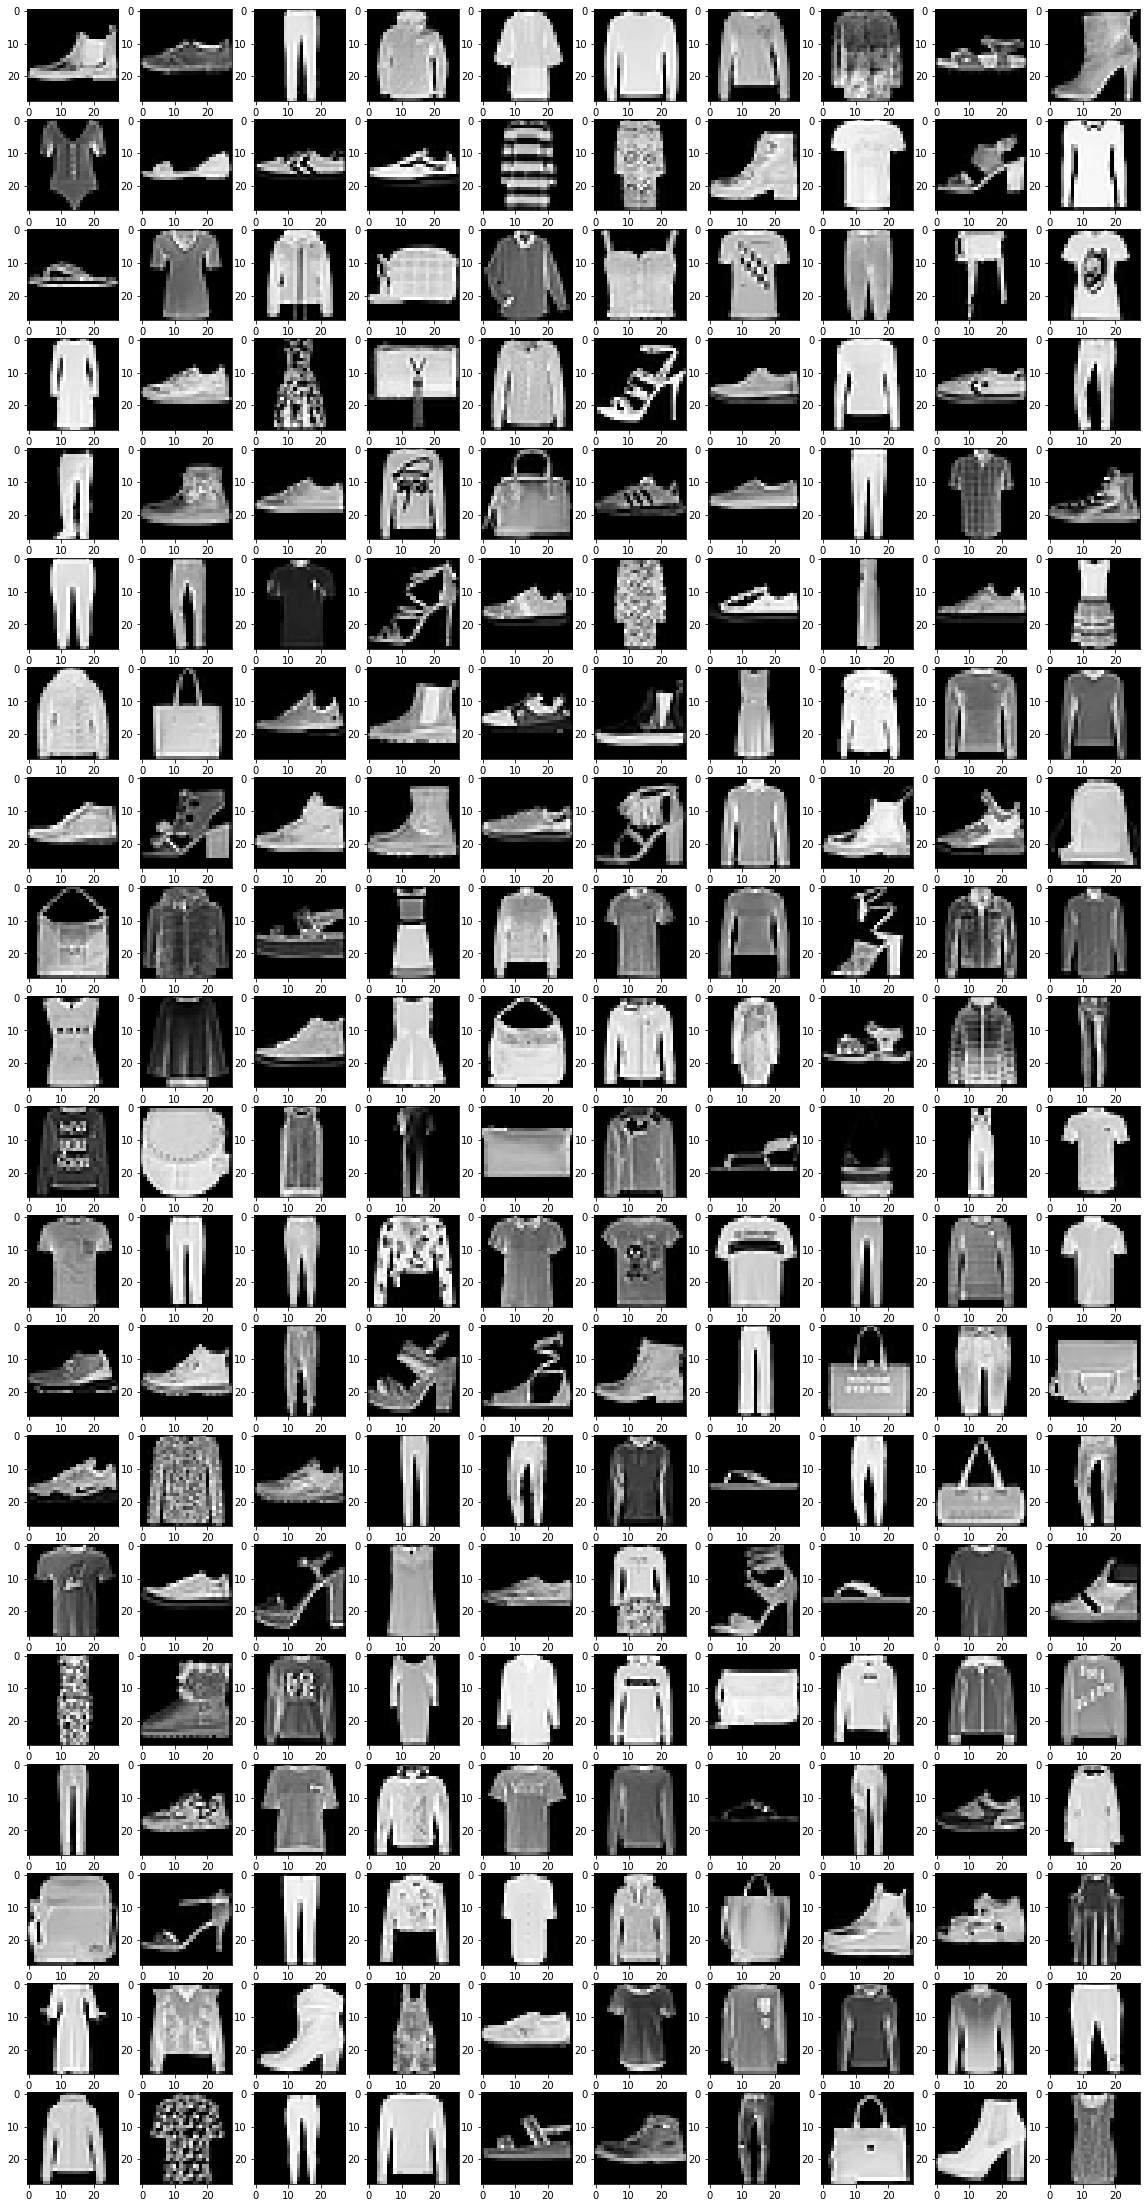

In [174]:
plt.figure(figsize=(20,40))
for i in range(200):
	plt.subplot(20,10,i+1),plt.imshow(train_x[i+2600],'gray')

plt.show()

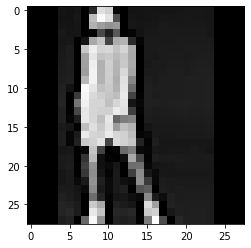

In [158]:
plt.imshow(train_x[842],'gray')